In [1]:
import numpy as np
from numpy import abs, sqrt, log10, sin, cos, exp, cosh, tanh, log, conj, cosh, sinh
np.set_printoptions(precision=16)
from math import pi, factorial
from numpy.random import rand
from numpy.linalg import norm
import scipy
import scipy.sparse as sp
from scipy.sparse import linalg, csc_matrix
import time
from scipy.optimize import minimize
from scipy.special import eval_hermite

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
#mpl.rcParams["figure.dpi"] = 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import pickle

#from qonn_cobyla import *

from qutip import *

import matplotlib as mpl

from matplotlib import cm

from numpy import array
from numpy import count_nonzero

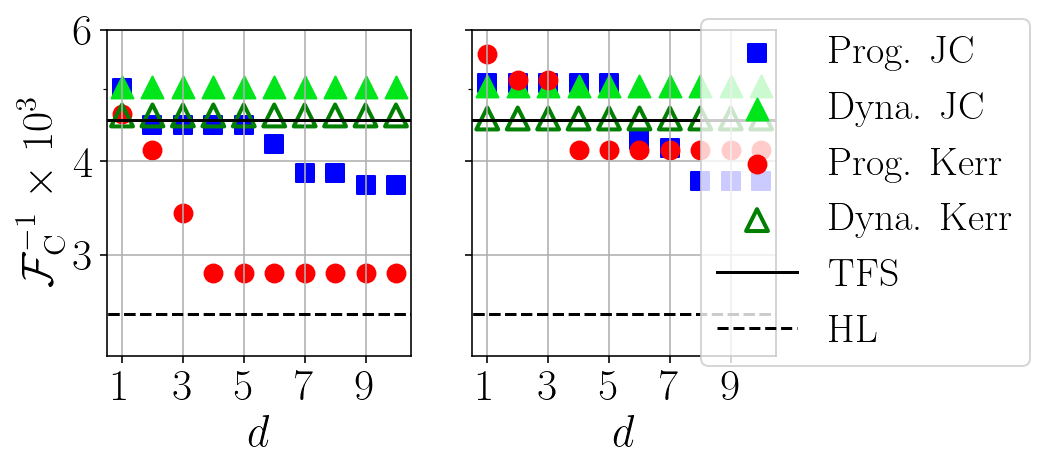

In [2]:
plt.rcParams["figure.figsize"] = [6, 3]
fig, ax = plt.subplots(1, 2)
marker_size = 80
fs = 22

N_p = 40
d_list = np.arange(1, 11, 1)

###################
# Photon counting ########################################################################################################################################################
###################

file = open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\Figure 7\Dphi_asaf_d_JC.p', 'rb')
input = pickle.load(file)

d_list = input[0]
Dphi_qfi_min = input[1]
QFI_max = input[3]
CFI_max = input[4]

i_N = 1

ax[0].grid()
ax[0].set_yscale('log')
ax[0].tick_params(axis='both', labelsize=fs)
ax[0].set_xlabel(r'$d$', fontsize=fs)
ax[0].set_yticklabels([])
#ax[0].set_title(r'$N={:}$'.format(int(N_p/2)), fontsize=fs)



seeds = np.arange(1, 60, 1)
name = 'seed_jc_random_asaf_d_uptoN'

cost_m_matrix = []

for seed in seeds:

    with open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\Figure 7\JC photon counting data\cost_m_'+name+'_Np={}_seed={}.p'.format(int(N_p), seed), 'rb') as fp:
        input = pickle.load(fp)
        cost_m_matrix.append(input)

cost_m_matrix = np.array(cost_m_matrix)
    
cost_m_min = np.min(cost_m_matrix, axis=0)
Dphi_cfi = -1/cost_m_min

Dphi_cfi_min = np.zeros(len(Dphi_cfi))
Dphi_min = Dphi_cfi[0]
Dphi_cfi_min[0] = Dphi_min
for i in range(len(Dphi_cfi)-1):
    if Dphi_cfi[i+1] < Dphi_min:
        Dphi_cfi_min[i+1] = Dphi_cfi[i+1]
        Dphi_min = Dphi_cfi[i+1]
    else:
        Dphi_cfi_min[i+1] = Dphi_min
ax[0].scatter(d_list, Dphi_cfi_min * 1e3, marker='s', s=marker_size, color='blue', label='Prog. JC')



ax[0].scatter(d_list, 1/CFI_max[i_N] * np.linspace(1, 1, len(d_list)) * 1e3, marker='^', s=1.5*marker_size, color=[0, 0.9, 0.1], label='Dyna. JC')


ax[0].plot([min(d_list)-1, max(d_list)+1], [2/(N_p/2*(N_p/2+2)) * 1e3, 2/(N_p/2*(N_p/2+2)) * 1e3], '-k')
ax[0].plot([min(d_list)-1, max(d_list)+1], [1/(N_p/2)**2 * 1e3, 1/(N_p/2)**2 * 1e3], '--k')

ax[0].set_xlim(min(d_list)-0.5, max(d_list)+0.5)
ax[0].set_ylabel(r'$\mathcal{F}^{-1}_{\rm C}$ $\times$ $10^{3}$', fontsize=fs)
ax[0].set_yticks([3e-3 * 1e3, 4e-3 * 1e3, 6e-3 * 1e3])
ax[0].set_yticklabels([r'$3$', r'$4$', r'$6$'])
ax[0].set_ylim(2.2e-3 * 1e3, 6e-3 * 1e3)



##########################
# Quadrature measurement ###################################################################################################################################################
##########################



ax[1].grid()
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', labelsize=fs)
ax[1].set_xlabel(r'$d$', fontsize=fs)
ax[1].set_yticklabels([])
#ax[1].set_title(r'$N={:}$'.format(int(N_p/2)), fontsize=fs)

seeds = np.arange(61, 120, 1)
name = 'seed_jc_random_asaf_d_uptoN_quad_meas'

cost_m_matrix = []

for seed in seeds:

    with open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\Figure 7\JC quadrature measurement data\cost_m_'+name+'_Np={}_seed={}.p'.format(int(N_p), seed), 'rb') as fp:
        input = pickle.load(fp)
        cost_m_matrix.append(input)

cost_m_matrix = np.array(cost_m_matrix)
    
cost_m_min = np.min(cost_m_matrix, axis=0)
Dphi_cfi = -1/cost_m_min

file = open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\Figure 7\data_CFI_max_N_dynamical_JC.p', 'rb')
input = pickle.load(file)
N_p_dynamical = input[0]
CFI_max = input[1]




Dphi_cfi_min = np.zeros(len(Dphi_cfi))
Dphi_min = Dphi_cfi[0]
Dphi_cfi_min[0] = Dphi_min
for i in range(len(Dphi_cfi)-1):
    if Dphi_cfi[i+1] < Dphi_min:
        Dphi_cfi_min[i+1] = Dphi_cfi[i+1]
        Dphi_min = Dphi_cfi[i+1]
    else:
        Dphi_cfi_min[i+1] = Dphi_min
ax[1].scatter(d_list, Dphi_cfi_min * 1e3, marker='s', s=marker_size, color='blue', label='Prog. JC')


ax[1].scatter(d_list, 1/CFI_max[4] * np.linspace(1, 1, len(d_list)) * 1e3, marker='^', s=1.5*marker_size, color=[0, 0.9, 0.1], label='Dyna. JC')



ax[1].plot([min(d_list)-1, max(d_list)+1], [2/(N_p/2*(N_p/2+2)) * 1e3, 2/(N_p/2*(N_p/2+2)) * 1e3], '-k')
ax[1].plot([min(d_list)-1, max(d_list)+1], [1/(N_p/2)**2 * 1e3, 1/(N_p/2)**2 * 1e3], '--k')

ax[1].set_xlim(min(d_list)-0.5, max(d_list)+0.5)
#ax[1].set_ylabel(r'$(\Delta\varphi)^2$', fontsize=fs)
ax[1].set_yticks([3e-3 * 1e3, 4e-3 * 1e3, 6e-3 * 1e3])
ax[1].set_yticklabels([])
ax[1].set_ylim(2.2e-3 * 1e3, 6e-3 * 1e3)

ax[0].set_xticks(np.arange(1, 11, 2))
ax[1].set_xticks(np.arange(1, 11, 2))

#ax[1].legend(bbox_to_anchor = (2.2, 0.5), loc='center right', fontsize=fs-5)

#plt.savefig('Figure 7 a b.svg', bbox_inches='tight', dpi=600)



















###########################################################################################################################################################################
# KERR NONLINEARITY #######################################################################################################################################################
###########################################################################################################################################################################


k = 2
N_p = 40
d_list = np.arange(1, 11, 1)
seeds = np.arange(41, 80, 1)


###################
# Photon counting ########################################################################################################################################################
###################

file = open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\Figure 9\Dphi_asaf_d_Kerr_N={}.p'.format(N_p), 'rb')
input = pickle.load(file)

d_list = input[0]
Dphi_qfi_min = input[1]
Dphi_cfi_min = input[2]
QFI_max = input[3]
CFI_max = input[4]

i_k = 0
i_N = 1

ax[0].scatter(d_list, Dphi_cfi_min * 1e3, s=marker_size, color='red', label='Prog. Kerr')

ax[0].scatter(d_list, 1/CFI_max[i_k, i_N]*np.linspace(1, 1, len(d_list)) * 1e3, marker='^', s=1.5*marker_size, facecolors='none', edgecolors='green', linewidth=2, label='Dyna. Kerr')

ax[0].plot([min(d_list)-1, max(d_list)+1], [2/(N_p/2*(N_p/2+2)) * 1e3, 2/(N_p/2*(N_p/2+2)) * 1e3], '-k')
ax[0].plot([min(d_list)-1, max(d_list)+1], [1/(N_p/2)**2 * 1e3, 1/(N_p/2)**2 * 1e3], '--k')


##########################
# Quadrature measurement ###################################################################################################################################################
##########################


with open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\SUPPLEMENTARY\Figure SM 1 optimal theta dynamical approach\CFI_qm_Kerr_theta_min_N=40.p', 'rb') as file: 
    input = pickle.load(file)
Dphi_min_dyna = input[2]



name = 'seed_kerr_res_asaf_d_uptoN_quad_meas'

cost_m_matrix = np.zeros((len(seeds), len(d_list)))

for i_s, seed in enumerate(seeds):

    with open('G:\Mi unidad\Efficient state generation for metrology\Paper v1\Figure 9\Kerr quadrature measurement data\cost_m_'+name+'_Np={}_seed={}.p'.format(int(N_p), seed), 'rb') as fp:
        cost_m_matrix[i_s, :] = pickle.load(fp)
    
cost_m_min = np.min(cost_m_matrix, axis=0)
i_m_min = np.argmin(cost_m_matrix, axis=0)
Dphi_cfi = -1/cost_m_min

Dphi_cfi_min = np.zeros(len(Dphi_cfi))
Dphi_min = Dphi_cfi[0]
Dphi_cfi_min[0] = Dphi_min
for i in range(len(Dphi_cfi)-1):
    if Dphi_cfi[i+1] < Dphi_min:
        Dphi_cfi_min[i+1] = Dphi_cfi[i+1]
        Dphi_min = Dphi_cfi[i+1]
    else:
        Dphi_cfi_min[i+1] = Dphi_min
ax[1].scatter(d_list, Dphi_cfi_min * 1e3, s=marker_size, color='red', label='Prog. Kerr')

ax[1].scatter(d_list, Dphi_min_dyna*np.linspace(1, 1, len(d_list)) * 1e3, marker='^', s=1.5*marker_size, facecolors='none', edgecolors='green', linewidth=2, label='Dyna. Kerr')

ax[1].plot([min(d_list)-1, max(d_list)+1], [2/(N_p/2*(N_p/2+2)) * 1e3, 2/(N_p/2*(N_p/2+2)) * 1e3], '-k', label='TFS')
ax[1].plot([min(d_list)-1, max(d_list)+1], [1/(N_p/2)**2 * 1e3, 1/(N_p/2)**2 * 1e3], '--k', label='HL')

ax[1].legend(bbox_to_anchor = (1.9, 0.5), loc='center right', fontsize=fs-2)

#plt.savefig('v2 Figure 5 output.svg', bbox_inches='tight', dpi=600)